In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv("/content/gdrive/MyDrive/realtor-data.csv")
data = data.dropna(subset = ['house_size', 'price'])
data

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
5,for_sale,179000.0,4.0,3.0,0.46,"Bo Calabazas San Sebastian, San Sebastian, PR,...",Bo Calabazas San Sebastian,San Sebastian,Puerto Rico,612.0,2520.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
923154,for_sale,445000.0,1.0,2.0,0.99,"1008 King St, Chappaqua, NY, 10514",1008 King St,Chappaqua,New York,10514.0,1052.0,2011-05-09
923155,for_sale,418000.0,4.0,2.0,0.40,"3 Elmwood Dr, Monroe, NY, 10950",3 Elmwood Dr,Monroe,New York,10950.0,1650.0,2015-07-21
923156,for_sale,469000.0,4.0,2.0,0.18,"13 N Conger Ave, Congers, NY, 10920",13 N Conger Ave,Congers,New York,10920.0,2123.0,NaN
923157,for_sale,825000.0,5.0,5.0,0.79,"7 Miller Rd, Valley Cottage, NY, 10989",7 Miller Rd,Valley Cottage,New York,10989.0,3775.0,2010-06-02


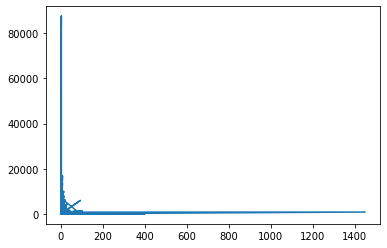

In [5]:
plt.plot(data["house_size"]/1000, data["price"]/10000)

# House_size VS Price


## ALL DATA

In [6]:
# Since the tutorial just using basic linear equation, y = ax + b
# We will using price as y and acre_lot as x
# create dummy data for training

x_train = np.array(data["house_size"], dtype=np.float32)
x_train = x_train.reshape(-1, 1)
y_train = np.array(data["price"], dtype=np.float32)
y_train = y_train.reshape(-1, 1)


In [7]:
x_train = x_train /1000.0
y_train = y_train /100000.0
print(x_train)
print(y_train)

[[0.92 ]
 [1.527]
 [0.748]
 ...
 [2.123]
 [3.775]
 [0.78 ]]
[[1.05]
 [0.8 ]
 [0.67]
 ...
 [4.69]
 [8.25]
 [0.88]]


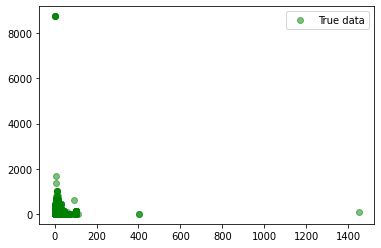

In [8]:
# with torch.no_grad(): # we don't need gradients in the testing phase
#     if torch.cuda.is_available():
#         predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
#     else:
#         predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
#     print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
#plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [9]:
model = LinearRegression()

In [10]:
model.fit(x_train, y_train)

LinearRegression()

In [11]:
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.02729473904430435


intercept: [6.1680956]
slope: [[1.6462035]]


(0.0, 2000.0)

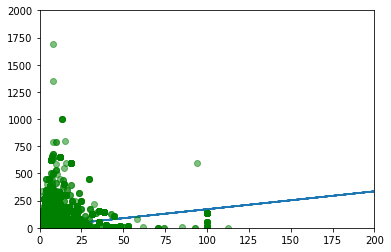

In [12]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_p = model.predict(x_train)
plt.plot(x_train, y_p)
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.xlim((0,200))
plt.ylim((0,2000))

## NY Data

In [13]:
data_ny = data[data['state'] == 'New York']
data_ny_train = data_ny.sample(frac=0.8)
data_np_test = data_ny.drop(data_ny_train.index)

print(data_ny_train.size)
print(data_np_test.size)

x_test = np.array(data_np_test["house_size"], dtype=np.float32)
x_test = x_test.reshape(-1, 1)
y_test = np.array(data_np_test["price"], dtype=np.float32)
y_test = y_test.reshape(-1, 1)
x_test = np.log(x_test /1000.0)
y_test = np.log(y_test /100000.0)

1287540
321888


In [14]:
# Since the tutorial just using basic linear equation, y = ax + b
# We will using price as y and acre_lot as x
# create dummy data for training

x_train = np.array(data_ny_train["house_size"], dtype=np.float32)
x_train = x_train.reshape(-1, 1)
y_train = np.array(data_ny_train["price"], dtype=np.float32)
y_train = y_train.reshape(-1, 1)



In [15]:
x_train = np.log(x_train /1000.0)
y_train = np.log(y_train /100000.0)
print(x_train)
print(y_train)

[[ 0.8548408 ]
 [ 1.011601  ]
 [-0.05129331]
 ...
 [ 0.91629076]
 [-1.2039728 ]
 [-0.17435342]]
[[4.4716387]
 [2.3513753]
 [1.6074358]
 ...
 [2.8332133]
 [0.3920421]
 [1.5018526]]


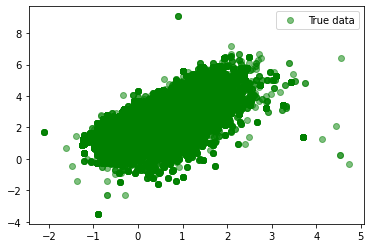

In [16]:
# with torch.no_grad(): # we don't need gradients in the testing phase
#     if torch.cuda.is_available():
#         predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
#     else:
#         predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
#     print(predicted)

plt.clf()
plt.plot((x_train), (y_train), 'go', label='True data', alpha=0.5)
#plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.37141149732005485


intercept: [1.9860705]
slope: [[0.9588657]]


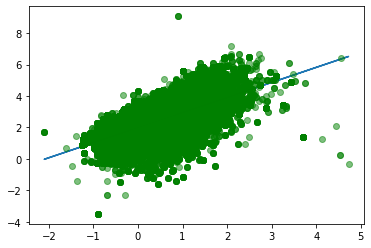

In [20]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_p = model.predict(x_train)
plt.plot(x_train, y_p)
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

intercept: [1.9860705]
slope: [[0.9588657]]


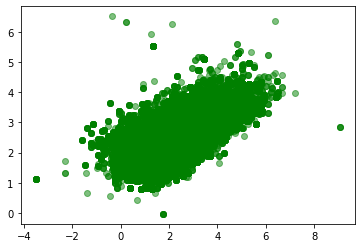

In [21]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_p = model.predict(x_train)
plt.plot(y_train, y_p, 'go', label='True data', alpha=0.5)


In [22]:
print(y_train)
print(y_p)

[[4.4716387]
 [2.3513753]
 [1.6074358]
 ...
 [2.8332133]
 [0.3920421]
 [1.5018526]]
[[2.805748  ]
 [2.95606   ]
 [1.9368871 ]
 ...
 [2.8646703 ]
 [0.83162224]
 [1.818889  ]]


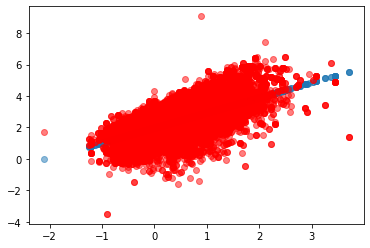

In [23]:
plt.scatter(x_test, model.predict(x_test), label='Predicted data', alpha=0.5)
plt.scatter(x_test, y_test, c = 'r',label='True data', alpha=0.5)


In [24]:
r_sq = model.score(x_test, y_test)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.3818856641731959


## Data Analysis Function by states

In [25]:
print(data['state'].drop_duplicates())
list_state = data['state'].drop_duplicates()

0            Puerto Rico
10334     Virgin Islands
24231      Massachusetts
27820        Connecticut
30126         New Jersey
30149           New York
32377      New Hampshire
33830            Vermont
81590       Rhode Island
214489           Wyoming
244195             Maine
353905           Georgia
448161      Pennsylvania
472451     West Virginia
612256          Delaware
Name: state, dtype: object


In [26]:
listofstates = list_state.to_list()

coefficient of determination: 0.25727370464103017
intercept: [1.0889344]
slope: [[0.59373826]]


0.2530023921373653

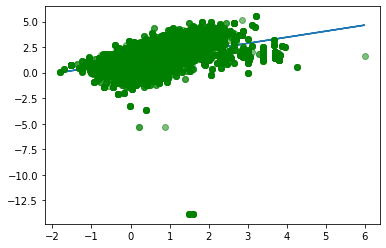

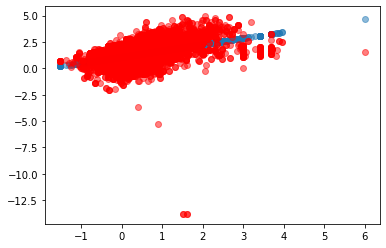

In [27]:
def LinearRegressbyStates(state):
  data_state = data[data['state'] == state]
  if data_state.size == 0:
    print("not a valid state")
  else:
    # random pick the train and test data
    data_state_train = data_state.sample(frac=0.8)
    data_state_test = data_state.drop(data_state_train.index)
    # modify the data to fit the model
    x_test = np.array(data_state_test["house_size"], dtype=np.float32)
    x_test = x_test.reshape(-1, 1)
    y_test = np.array(data_state_test["price"], dtype=np.float32)
    y_test = y_test.reshape(-1, 1)
    x_test = np.log(x_test /1000.0 + 1e-6)
    y_test = np.log(y_test /100000.0 + 1e-6)


    x_train = np.array(data_state_train["house_size"], dtype=np.float32)
    x_train = x_train.reshape(-1, 1)
    y_train = np.array(data_state_train["price"], dtype=np.float32)
    y_train = y_train.reshape(-1, 1)
    x_train = np.log(x_train /1000.0 + 1e-6)
    y_train = np.log(y_train /100000.0 + 1e-6)

    model = LinearRegression()
    try:
      model.fit(x_train, y_train)
    except:
      print(x_train)
      print(y_train)
      plt.scatter(x_train, y_train)
      raise ValueError
    r_sq = model.score(x_train, y_train)
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    y_p = model.predict(x_train)
    plt.figure(1)
    plt.plot(x_train, y_p)
    plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
    plt.figure(2)
    plt.scatter(x_test, model.predict(x_test), label='Predicted data', alpha=0.5)
    plt.scatter(x_test, y_test, c = 'r',label='True data', alpha=0.5)

    r_sq = model.score(x_test, y_test)
    # # print(f"coefficient of determination: {r_sq}")
    return r_sq


LinearRegressbyStates("New Jersey")


coefficient of determination: 0.4309484611642762
intercept: [0.15863314]
slope: [[1.16293]]
coefficient of determination: 0.6556456633928545
intercept: [0.9974024]
slope: [[1.082182]]
coefficient of determination: 0.30278443567464863
intercept: [1.5266774]
slope: [[0.7275087]]
coefficient of determination: 0.5026811812721983
intercept: [0.6278533]
slope: [[0.9999727]]
coefficient of determination: 0.2556266283091533
intercept: [1.0909497]
slope: [[0.59614366]]
coefficient of determination: 0.37442853761083617
intercept: [1.9865102]
slope: [[0.96362615]]
coefficient of determination: 0.44532996445115647
intercept: [0.8812007]
slope: [[0.9039003]]
coefficient of determination: 0.3993812424211317
intercept: [0.65925837]
slope: [[0.96195704]]
coefficient of determination: 0.2785055936937333
intercept: [1.1013085]
slope: [[0.5253434]]
coefficient of determination: 1.0
intercept: [1.6770967]
slope: [[0.]]
coefficient of determination: 0.27724755294097914
intercept: [0.8005219]
slope: [[0.751

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


coefficient of determination: 1.0
intercept: [-0.470002]
slope: [[0.]]
coefficient of determination: 0.5344152389972615
intercept: [0.4117378]
slope: [[1.0723528]]
{'Puerto Rico': 0.43280019291383454, 'Virgin Islands': 0.5723293907319739, 'Massachusetts': 0.30671414095822847, 'Connecticut': 0.4915820735126918, 'New Jersey': 0.2595876448781733, 'New York': 0.3699303614039443, 'New Hampshire': 0.4545802173217094, 'Vermont': 0.39535053031374445, 'Rhode Island': 0.28928492558755947, 'Wyoming': nan, 'Maine': 0.2784517438443038, 'Georgia': 0.9665158708232088, 'Pennsylvania': 0.4479035174745394, 'West Virginia': nan, 'Delaware': 0.5646344406748907}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


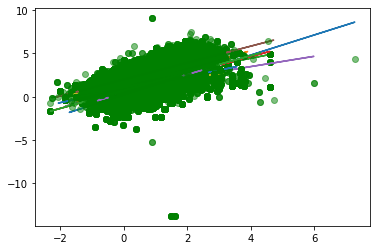

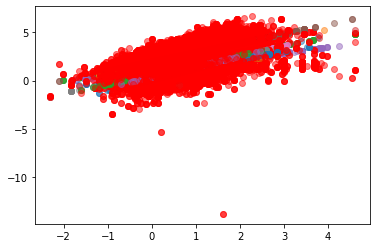

In [28]:
stateoutcomes = {}
for state in listofstates:
    
   result = LinearRegressbyStates(state)
   stateoutcomes[state] = result

print(stateoutcomes)

coefficient of determination: 0.6655619541562168
intercept: [0.99982905]
slope: [[1.0912026]]


0.5507058141111312

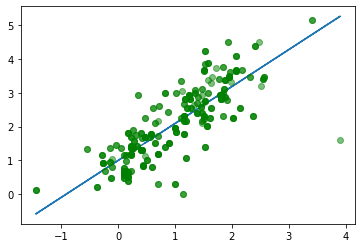

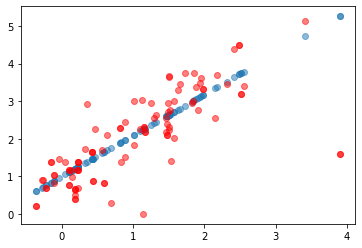

In [29]:
LinearRegressbyStates("Virgin Islands")

# acre_lot VS Price


In [30]:
from sklearn import preprocessing
data = pd.read_csv("/content/gdrive/MyDrive/realtor-data.csv")
data = data.dropna(subset = ['acre_lot', 'price'])
print(data['state'].drop_duplicates())

0            Puerto Rico
10334     Virgin Islands
24231      Massachusetts
27820        Connecticut
28142      New Hampshire
28258            Vermont
30126         New Jersey
30149           New York
78833          Tennessee
81590       Rhode Island
214489           Wyoming
244195             Maine
251622          Virginia
448161      Pennsylvania
472451     West Virginia
576439           Georgia
612256          Delaware
Name: state, dtype: object


## Function:

In [31]:
def LinearRegressbyStatesusingAcre_lot(state):
  data_state = data[data['state'] == state]
  if data_state.size == 0:
    print("not a valid state")
    return -1
  if data_state.size <= 100:
    print("not enough data")
    return -2
  else:
    # random pick the train and test data
    data_state_train = data_state.sample(frac=0.8)
    data_state_test = data_state.drop(data_state_train.index)
    # modify the data to fit the model
    x_test = np.array(data_state_test["acre_lot"], dtype=np.float32).reshape(-1, 1)
    x_test = np.log(x_test+ 2e-6)
    y_test = np.array(data_state_test["price"], dtype=np.float32).reshape(-1, 1)
    y_test = np.log(y_test+ 2e-6)

    # plt.scatter(x_test, y_test)


    x_train = np.array(data_state_train["acre_lot"], dtype=np.float32).reshape(-1, 1)
    x_train = np.log(x_train+ 2e-6)
    y_train = np.array(data_state_train["price"], dtype=np.float32).reshape(-1, 1)
    y_train = np.log(y_train+ 2e-6)

    # plt.scatter(x_train, y_train)
    
    model = LinearRegression()
    try:
      model.fit(x_train, y_train)
    except:
      print(x_train)
      print(y_train)
      plt.scatter(x_train, y_train)
      raise ValueError
    # r_sq = model.score(x_train, y_train)
    # print(f"coefficient of determination: {r_sq}")
    # print(f"intercept: {model.intercept_}")
    # print(f"slope: {model.coef_}")
    # y_p = model.predict(x_train)
    # plt.figure(1)
    # plt.plot(x_train, y_p)
    # plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
    # plt.figure(2)
    # plt.scatter(x_test, model.predict(x_test), label='Predicted data', alpha=0.5)
    # plt.scatter(x_test, y_test, c = 'r',label='True data', alpha=0.5)

    r_sq = model.score(x_test, y_test)
    # # print(f"coefficient of determination: {r_sq}")
    return r_sq
  
LinearRegressbyStatesusingAcre_lot("Delaware")

0.31788253219484575

In [32]:
stateoutcomes = {}
for state in listofstates:
    
   result = LinearRegressbyStatesusingAcre_lot(state)
   stateoutcomes[state] = result

print(stateoutcomes)

not enough data
not enough data
not enough data
{'Puerto Rico': 0.07263074760166577, 'Virgin Islands': 0.2719490381035593, 'Massachusetts': 0.024763745747558463, 'Connecticut': 0.0949815977551951, 'New Jersey': 0.02326881074899334, 'New York': 0.0739867902606729, 'New Hampshire': 0.013938046261101067, 'Vermont': 0.05867835667395016, 'Rhode Island': 0.10059958053440254, 'Wyoming': -2, 'Maine': 0.003784185745665525, 'Georgia': -2, 'Pennsylvania': 0.07325877349082399, 'West Virginia': -2, 'Delaware': 0.43273734703533606}


# Multi linear regression

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [34]:
data = pd.read_csv("/content/gdrive/MyDrive/realtor-data.csv")
data = data.dropna(subset = ['acre_lot', 'house_size', 'price'])
data



,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
5,for_sale,179000.0,4.0,3.0,0.46,"Bo Calabazas San Sebastian, San Sebastian, PR,...",Bo Calabazas San Sebastian,San Sebastian,Puerto Rico,612.0,2520.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
923154,for_sale,445000.0,1.0,2.0,0.99,"1008 King St, Chappaqua, NY, 10514",1008 King St,Chappaqua,New York,10514.0,1052.0,2011-05-09
923155,for_sale,418000.0,4.0,2.0,0.40,"3 Elmwood Dr, Monroe, NY, 10950",3 Elmwood Dr,Monroe,New York,10950.0,1650.0,2015-07-21
923156,for_sale,469000.0,4.0,2.0,0.18,"13 N Conger Ave, Congers, NY, 10920",13 N Conger Ave,Congers,New York,10920.0,2123.0,NaN
923157,for_sale,825000.0,5.0,5.0,0.79,"7 Miller Rd, Valley Cottage, NY, 10989",7 Miller Rd,Valley Cottage,New York,10989.0,3775.0,2010-06-02


In [35]:
# x = data[["state","acre_lot","house_size"]]
# y = data[["state","price"]]
# x

## Function

In [36]:
def MutiLinearRegressionbyStates(state):
  data_state = data[data['state'] == state]
  if data_state.size < 100:
    print("invaild state or not enough data")
    return -2
  else:
    data_state_train = data_state.sample(frac=0.8)
    data_state_test = data_state.drop(data_state_train.index)
    # nomralize later and log
    x_train = data_state_train[["acre_lot","house_size"]]
    y_train = data_state_train["price"]
    x_test = data_state_test[["acre_lot","house_size"]]
    y_test = data_state_test["price"]
    print(len(x_test))
    print(len(x_train))

    model = LinearRegression()
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    # plt.scatter(x_test, y_test, label='Predicted data', alpha=0.5)
    # plt.scatter(x_test, predictions, c = 'r',label='True data', alpha=0.5)

    r_sq = model.score(x_test, y_test)
    return r_sq
MutiLinearRegressionbyStates("Delaware")

348
1394


0.6228629590741213

# r_sq Analysis

## Linear


In [37]:
#@title function
def LinearRegressbyStatesColumn(state, column, data_in):
  data_state = data_in[data_in['state'] == state].copy()
  if data_state.size == 0:
    print("not a valid state")
    return -1
  elif data_state.size < 50:
    return -2
  else:
    data_state_train = data_state.sample(frac=0.8, random_state = 0)
    data_state_test = data_state.drop(data_state_train.index)
    x_test = np.array(data_state_test[column], dtype=np.float32)
    x_test = x_test.reshape(-1, 1)
    y_test = np.array(data_state_test["price"], dtype=np.float32)
    y_test = y_test.reshape(-1, 1)

    x_train = np.array(data_state_train[column], dtype=np.float32)
    x_train = x_train.reshape(-1, 1)
    y_train = np.array(data_state_train["price"], dtype=np.float32)
    y_train = y_train.reshape(-1, 1)

    model = LinearRegression()
    try:
      model.fit(x_train, y_train)
    except:
      return -3
      raise ValueError
    
    # plt.plot(x_test, model.predict(x_test),"r")
    # plt.scatter(x_test,y_test)
    r_sq = model.score(x_test, y_test)
    return r_sq

In [38]:
new_data= pd.read_csv("/content/gdrive/MyDrive/realtor-data.csv")
data_with_house_size = new_data.dropna(subset = ['house_size', 'price'])[['house_size', 'price','state']]
data_with_acre_lot = new_data.dropna(subset = ['acre_lot', 'price'])[['acre_lot', 'price','state']]
data_with_house_size['log_house_size'] = np.log(data_with_house_size['house_size'])
data_with_acre_lot['log_acre_lot'] = np.log(data_with_acre_lot['acre_lot'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Virgin Islands house price prediction with house size(log)')

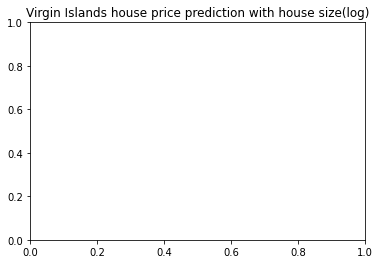

In [39]:
LinearRegressbyStatesColumn("Virgin Islands",'log_house_size',data_with_house_size)
plt.title("Virgin Islands house price prediction with house size(log)")
# seed = 0

In [40]:
type(listofstates)
data_with_house_size

,house_size,price,state,log_house_size
0,920.0,105000.0,Puerto Rico,6.824374
1,1527.0,80000.0,Puerto Rico,7.331060
2,748.0,67000.0,Puerto Rico,6.617403
3,1800.0,145000.0,Puerto Rico,7.495542
5,2520.0,179000.0,Puerto Rico,7.832014
...,...,...,...,...
923154,1052.0,445000.0,New York,6.958448
923155,1650.0,418000.0,New York,7.408531
923156,2123.0,469000.0,New York,7.660585
923157,3775.0,825000.0,New York,8.236156


{'Virgin Islands': 0.36193692256308596, 'Massachusetts': 0.2492487280387906, 'Connecticut': 0.15839443602531533, 'New York': 0.07616104689053582, 'New Hampshire': 0.31338535880961216, 'Vermont': 0.33494342681840295, 'Rhode Island': 0.17324244295810398, 'Maine': 0.24106956505196053, 'Georgia': 0.9527599770387752, 'Pennsylvania': 0.3224474325274327, 'Delaware': 0.5179390479094028}

{'Puerto Rico': 0.17652007866442854, 'Virgin Islands': 0.3974554193766129, 'Massachusetts': 0.23290400122126653, 'Connecticut': 0.11587828558527546, 'New Jersey': 0.1680315345909218, 'New York': 0.07448739924089653, 'New Hampshire': 0.20368688719109607, 'Vermont': 0.27485060803044825, 'Rhode Island': 0.14531194037157957, 'Maine': 0.19732716309767862, 'Georgia': 0.9527569826129278, 'Pennsylvania': 0.2590932285144768, 'Delaware': 0.48657153075090576}
acre lot:
{'Virgin Islands': 0.18018296309483617, 'Massachusetts': 0.0004806445883959176, 'New Hampshire': 0.020879433809333436, 'Vermont': 0.0898790480138918, 'Rho

<BarContainer object of 6 artists>

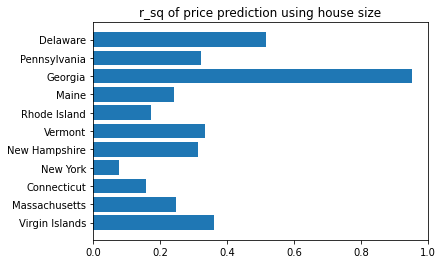

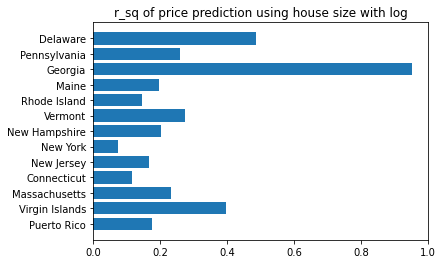

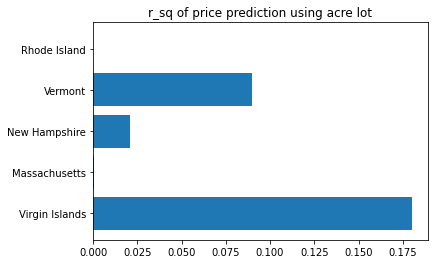

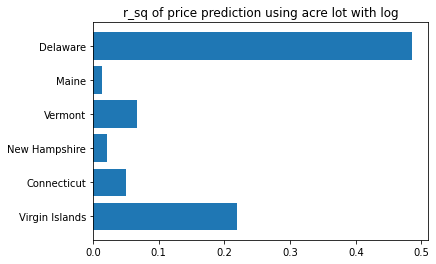

In [41]:
stateoutcomes_house_size = {}
for state in listofstates:
  result = LinearRegressbyStatesColumn(state,'house_size',data_with_house_size)
  if result < 0: continue
  stateoutcomes_house_size[state] = result

print(stateoutcomes_house_size)
plt.figure(1)
plt.title("r_sq of price prediction using house size")
plt.barh(range(len(stateoutcomes_house_size)), stateoutcomes_house_size.values(), tick_label=list(stateoutcomes_house_size.keys()))
stateoutcomes_house_size_log = {}
for state in listofstates:
  result = LinearRegressbyStatesColumn(state,'log_house_size',data_with_house_size)
  if result < 0: continue
  stateoutcomes_house_size_log[state] = result
print()
print(stateoutcomes_house_size_log)
plt.figure(2)
plt.title("r_sq of price prediction using house size with log")
plt.barh(range(len(stateoutcomes_house_size_log)), stateoutcomes_house_size_log.values(), tick_label=list(stateoutcomes_house_size_log.keys()))
stateoutcomes_acre_lot = {}
for state in listofstates:
  result = LinearRegressbyStatesColumn(state,'acre_lot',data_with_acre_lot)
  if result < 0: continue
  stateoutcomes_acre_lot[state] = result
print("acre lot:")
print(stateoutcomes_acre_lot)
plt.figure(3)
plt.title("r_sq of price prediction using acre lot")
plt.barh(range(len(stateoutcomes_acre_lot)), stateoutcomes_acre_lot.values(), tick_label=list(stateoutcomes_acre_lot.keys()))
stateoutcomes_acre_lot_log = {}
for state in listofstates:
  result = LinearRegressbyStatesColumn(state,'log_acre_lot',data_with_acre_lot)
  if result < 0: continue
  stateoutcomes_acre_lot_log[state] = result
print("acre lot with log:")
print(stateoutcomes_acre_lot_log)
plt.figure(4)
plt.title("r_sq of price prediction using acre lot with log")
plt.barh(range(len(stateoutcomes_acre_lot_log)), stateoutcomes_acre_lot_log.values(), tick_label=list(stateoutcomes_acre_lot_log.keys()))

## Muti Linear


In [42]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

In [46]:
new_data_2= pd.read_csv("/content/gdrive/MyDrive/realtor-data.csv")
data_with_both = new_data_2.dropna(subset = ['house_size', 'price','acre_lot'])[['house_size','acre_lot', 'price','state']]
data_with_both['log_acre_lot'] = np.log(data_with_both['acre_lot'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
def MutiLinearRegressionPLUS(state):
  data_state = data_with_both[data_with_both['state'] == state]
  if data_state.size < 100:
    print("invaild state or not enough data")
    return -2
  else:
    print(len(data_state))
    data_state_train = data_state.sample(frac=0.8, random_state = 1)
    data_state_test = data_state.drop(data_state_train.index)
    # nomralize later and log
    x_train = data_state_train[["log_acre_lot","house_size"]]
    y_train = data_state_train["price"]
    x_test = data_state_test[["log_acre_lot","house_size"]]
    y_test = data_state_test["price"]

    model = LinearRegression()
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    r_sq_1 = model.score(x_test, y_test)
    # Normalization
    
     
    min_max_scaler = MinMaxScaler().fit(x_test)
    x_train_nomal = min_max_scaler.transform(x_train)
    x_test_nomal = min_max_scaler.transform(x_test)

    model = LinearRegression()
    model.fit(x_train_nomal,y_train)
    predictions = model.predict(x_test_nomal)

    r_sq_2 = model.score(x_test_nomal, y_test)

    # Standardization
    scaler = StandardScaler().fit(x_train)
    x_train_std = scaler.transform(x_train)
    x_test_std = scaler.transform(x_test)

    model = LinearRegression()
    model.fit(x_train_std,y_train)
    predictions = model.predict(x_test_std)

    r_sq_3 = model.score(x_test_std, y_test)

    return r_sq_1,r_sq_2,r_sq_3
print(MutiLinearRegressionPLUS("Delaware"))

1742
(0.6417373874148626, 0.6417373874148626, 0.6417373874148626)


# Unused Code

In [45]:
# class linearRegression(torch.nn.Module):
#     def __init__(self, inputSize, outputSize):
#         super(linearRegression, self).__init__()
#         self.linear = torch.nn.Linear(inputSize, outputSize)

#     def forward(self, x):
#         out = self.linear(x)
#         return out

# #@title
# inputDim = 1        # takes variable 'x' 
# outputDim = 1       # takes variable 'y'
# learningRate = 0.01
# epochs = 100

# model = linearRegression(inputDim, outputDim)
# ##### For GPU #######
# if torch.cuda.is_available():
#     model.cuda()


# #@title
# # initialize the loss (Mean Squared Error) and optimization (Stochastic Gradient Descent)
# criterion = torch.nn.MSELoss() 
# optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
# #@title
# for epoch in range(100):
#     # Converting inputs and labels to Variable
#     if torch.cuda.is_available():
#         inputs = Variable(torch.from_numpy(x_train).cuda())
#         labels = Variable(torch.from_numpy(y_train).cuda())
#     else:
#         inputs = Variable(torch.from_numpy(x_train))
#         labels = Variable(torch.from_numpy(y_train))

#     # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    

#     # get output from the model, given the inputs
#     outputs = model(inputs)

#     # get loss for the predicted output
#     loss = criterion(outputs, labels)
#     print(loss)
#     # get gradients w.r.t to parameters
#     optimizer.zero_grad()
#     loss.backward()

#     # update parameters
#     optimizer.step()

#     print('epoch {}, loss {}'.format(epoch, loss.item()))
# #@title
# data.hist(column = ["price"], bins = 100)
# #@title
# data.describe()
# #@title
# data
# #@title
# data.dropna(subset = ['house_size', 'price'])